In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
import pickle
import json
import warnings 
warnings.filterwarnings('ignore')

In [66]:
df=pd.read_csv('medical_insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [67]:
df.shape

(1338, 7)

In [68]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [70]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<Axes: >

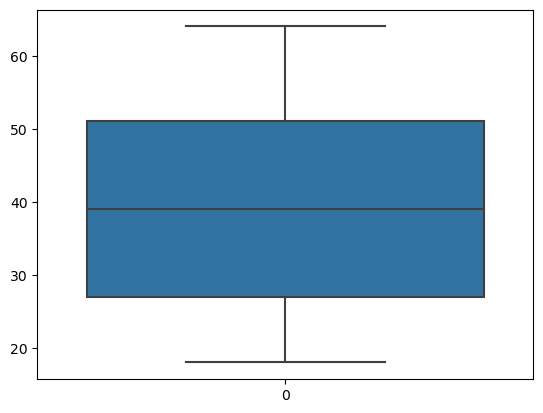

In [9]:
#age
sns.boxplot(df['age'])

<Axes: xlabel='age', ylabel='Count'>

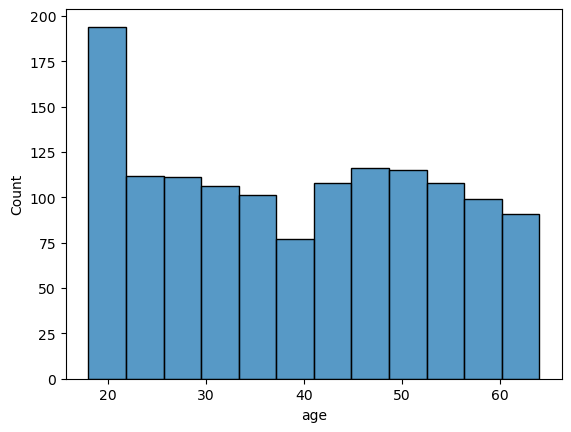

In [71]:
sns.histplot(df['age'])

<Axes: xlabel='age', ylabel='Density'>

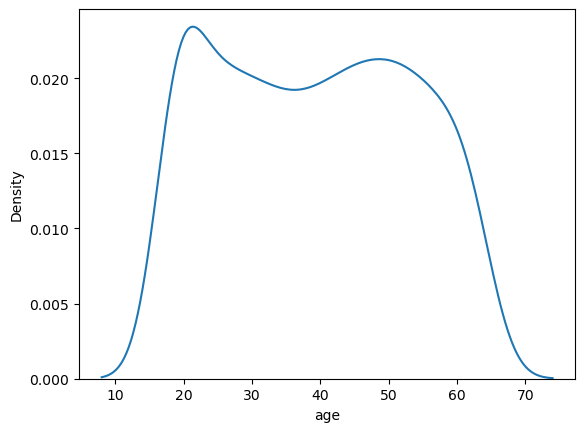

In [14]:
sns.kdeplot(df['age'])

<Axes: xlabel='bmi', ylabel='Count'>

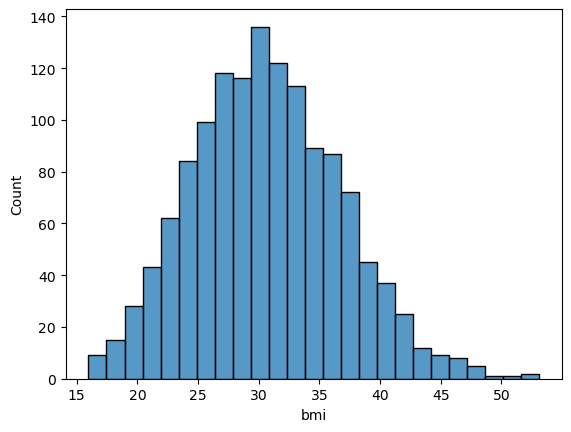

In [72]:
#sex
sns.histplot(df['bmi'])

<Axes: >

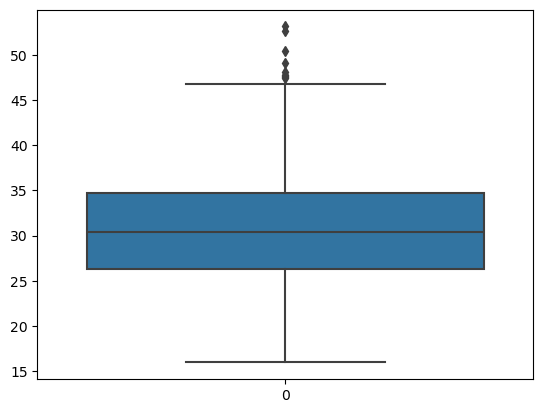

In [73]:
sns.boxplot(df['bmi'])

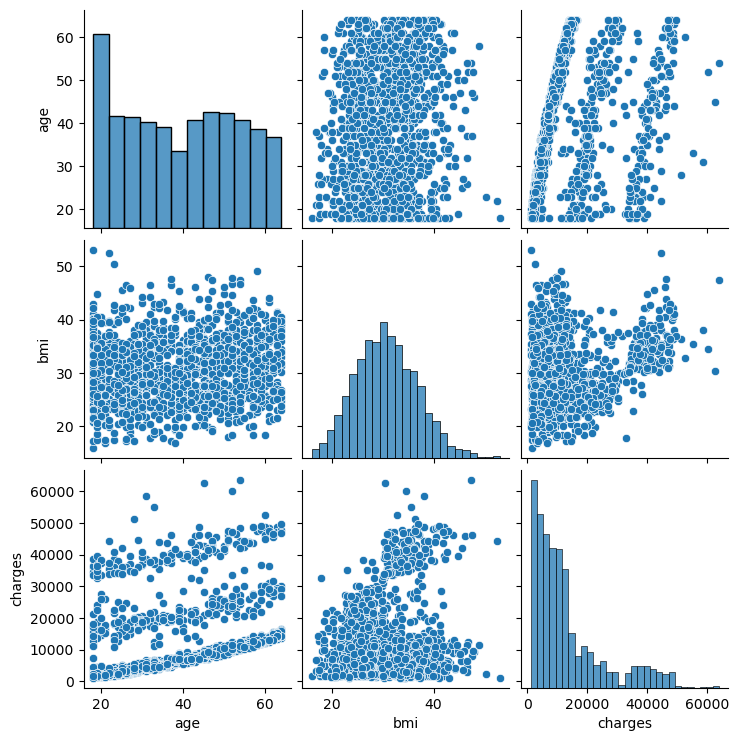

In [74]:
sns.pairplot(data=df,vars=['age','bmi','charges'])

In [75]:
pd.crosstab(df['sex'],df['region'])

region,northeast,northwest,southeast,southwest
sex,,,,
female,161,164,175,162
male,163,161,189,163


In [76]:
df1=df.groupby('age').agg(region_index=('region','value_counts'))
df1

region_index
age region                 
18  southeast            37
    northeast            32
19  northwest            34
    southwest            31
    southeast             3
...                     ...
63  northeast             5
64  southeast             8
    northwest             5
    southwest             5
    northeast             4

[185 rows x 1 columns]

In [77]:
df.rename(columns={'sex':'gender'},inplace=True)
df.head(1)

,age,gender,bmi,children,smoker,region,charges
0,19,female,27.9,0,yes,southwest,16884.924


In [78]:
df['gender'].replace({'male':0,'female':1},inplace=True)
df.head(2)

,age,gender,bmi,children,smoker,region,charges
0,19,1,27.90,0,yes,southwest,16884.9240
1,18,0,33.77,1,no,southeast,1725.5523


In [79]:
df['smoker'].replace({'yes':1,'no':0},inplace=True)
df.head(2)

,age,gender,bmi,children,smoker,region,charges
0,19,1,27.90,0,1,southwest,16884.9240
1,18,0,33.77,1,0,southeast,1725.5523


In [80]:
df=pd.get_dummies(data=df,columns=['region'],dtype=int)
df

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,1,27.900,0,1,16884.92400,0,0,0,1
1,18,0,33.770,1,0,1725.55230,0,0,1,0
2,28,0,33.000,3,0,4449.46200,0,0,1,0
3,33,0,22.705,0,0,21984.47061,0,1,0,0
4,32,0,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,10600.54830,0,1,0,0
1334,18,1,31.920,0,0,2205.98080,1,0,0,0
1335,18,1,36.850,0,0,1629.83350,0,0,1,0
1336,21,1,25.800,0,0,2007.94500,0,0,0,1


In [81]:
bins=[0,18,25,45,60,np.inf]
labels=[0,1,2,3,4]
df['age_buckets']=pd.cut(df['age'],bins=bins,labels=labels,include_lowest=True)
df.head(1)

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,age_buckets
0,19,1,27.9,0,1,16884.924,0,0,0,1,1


In [82]:
df['weight']=np.where(df['bmi']>=25,1,0)
df.head(1)

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,age_buckets,weight
0,19,1,27.9,0,1,16884.924,0,0,0,1,1,1


In [83]:
df['risky']=np.where(df['age_buckets']==4,1,0)
df.head(1)

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,age_buckets,weight,risky
0,19,1,27.9,0,1,16884.924,0,0,0,1,1,1,0


In [84]:
df.columns.duplicated().any()

False

In [85]:
df[df.duplicated()]

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,age_buckets,weight,risky
581,19,0,30.59,0,0,1639.5631,0,1,0,0,1,1,0


In [86]:
df.shape
df1=df[~df.duplicated()]
df1.shape

(1337, 13)

In [87]:
df1.corr()

,age,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,age_buckets,weight,risky
age,1.000000,0.019814,0.109344,0.041536,-0.025587,0.298308,0.001868,0.001495,-0.012311,0.009415,0.929639,0.096043,0.447774
gender,0.019814,1.000000,-0.046397,-0.017848,-0.076596,-0.058044,0.002008,0.012482,-0.017578,0.003767,0.019426,-0.029740,0.011537
bmi,0.109344,-0.046397,1.000000,0.012755,0.003746,0.198401,-0.138178,-0.136138,0.270057,-0.006211,0.094760,0.657080,0.078810
children,0.041536,-0.017848,0.012755,1.000000,0.007331,0.067389,-0.023202,0.026044,-0.023492,0.021538,0.068831,-0.010499,-0.097862
smoker,-0.025587,-0.076596,0.003746,0.007331,1.000000,0.787234,0.002597,-0.036321,0.068282,-0.037168,-0.014319,-0.022945,0.024652
charges,0.298308,-0.058044,0.198401,0.067389,0.787234,1.000000,0.005945,-0.038695,0.073578,-0.043637,0.279095,0.117260,0.173769
region_northeast,0.001868,0.002008,-0.138178,-0.023202,0.002597,0.005945,1.000000,-0.319842,-0.345909,-0.320493,-0.024529,-0.106608,-0.007294
region_northwest,0.001495,0.012482,-0.136138,0.026044,-0.036321,-0.038695,-0.319842,1.000000,-0.345909,-0.320493,0.029633,-0.047954,0.006568
region_southeast,-0.012311,-0.017578,0.270057,-0.023492,0.068282,0.073578,-0.345909,-0.345909,1.000000,-0.346614,-0.038372,0.111632,0.001502
region_southwest,0.009415,0.003767,-0.006211,0.021538,-0.037168,-0.043637,-0.320493,-0.320493,-0.346614,1.000000,0.034720,0.038559,-0.000834


In [89]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   age               1337 non-null   int64   
 1   gender            1337 non-null   int64   
 2   bmi               1337 non-null   float64 
 3   children          1337 non-null   int64   
 4   smoker            1337 non-null   int64   
 5   charges           1337 non-null   float64 
 6   region_northeast  1337 non-null   int32   
 7   region_northwest  1337 non-null   int32   
 8   region_southeast  1337 non-null   int32   
 9   region_southwest  1337 non-null   int32   
 10  age_buckets       1337 non-null   category
 11  weight            1337 non-null   int32   
 12  risky             1337 non-null   int32   
dtypes: category(1), float64(2), int32(6), int64(4)
memory usage: 106.0 KB


In [91]:
df1['age_buckets']=df1['age_buckets'].astype(int)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               1337 non-null   int64  
 1   gender            1337 non-null   int64  
 2   bmi               1337 non-null   float64
 3   children          1337 non-null   int64  
 4   smoker            1337 non-null   int64  
 5   charges           1337 non-null   float64
 6   region_northeast  1337 non-null   int32  
 7   region_northwest  1337 non-null   int32  
 8   region_southeast  1337 non-null   int32  
 9   region_southwest  1337 non-null   int32  
 10  age_buckets       1337 non-null   int32  
 11  weight            1337 non-null   int32  
 12  risky             1337 non-null   int32  
dtypes: float64(2), int32(7), int64(4)
memory usage: 109.7 KB


In [93]:
vif_list=[]
for i in range (df1.shape[1]):
    vif=variance_inflation_factor(df1.to_numpy(),i)
    vif_list.append(vif)
vif_list    

[8.085642088156062,
 1.0091075715643296,
 2.0303045118269623,
 1.049240331154307,
 3.5574205533842926,
 4.022258776235202,
 11.097091255544532,
 10.941753364767626,
 14.656919207469121,
 11.669796251449984,
 8.361601540598459,
 1.784645664531676,
 1.4158848553314523]

In [94]:
s1=pd.Series(vif_list,index=df1.columns)
s1

age                  8.085642
gender               1.009108
bmi                  2.030305
children             1.049240
smoker               3.557421
charges              4.022259
region_northeast    11.097091
region_northwest    10.941753
region_southeast    14.656919
region_southwest    11.669796
age_buckets          8.361602
weight               1.784646
risky                1.415885
dtype: float64

In [95]:
df1.drop('age',axis=1,inplace=True)
df1.head(1)

,gender,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest,age_buckets,weight,risky
0,1,27.9,0,1,16884.924,0,0,0,1,1,1,0


In [97]:
vif_list=[]
for i in range (df1.shape[1]):
    vif=variance_inflation_factor(df1.to_numpy(),i)
    vif_list.append(vif)
vif_list 
s1=pd.Series(vif_list,index=df1.columns)
s1

gender               1.009103
bmi                  2.027881
children             1.039729
smoker               3.380272
charges              3.785201
region_northeast     9.861370
region_northwest     9.945902
region_southeast    13.267278
region_southwest    10.646089
age_buckets          1.671450
weight               1.783900
risky                1.397359
dtype: float64

In [99]:
x=df1.drop(['charges'],axis=1)
y=df1['charges']
x.shape,y.shape

((1337, 11), (1337,))

In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=40,test_size=0.2)
x_train.shape,x_test.shape

((1069, 11), (268, 11))

In [102]:
KR=KNeighborsRegressor()
KR.fit(x_train,y_train)

KNeighborsRegressor()

In [103]:
#traning
y_pred=KR.predict(x_train)
r2=r2_score(y_train,y_pred)
print('r2 score ', r2)
mse=mean_squared_error(y_train,y_pred)
print('mse ', mse)
mae=mean_absolute_error(y_train,y_pred)
print('mae ',mae)

#testing
print()
y_pred=KR.predict(x_test)
r2=r2_score(y_test,y_pred)
print('r2 score ', r2)
mse=mean_squared_error(y_test,y_pred)
print('mse ', mse)
mae=mean_absolute_error(y_test,y_pred)
print('mae ',mae)

r2 score  0.5695569931010696
mse  61616021.743370436
mae  5259.136534711505

r2 score  0.4525063926437042
mse  87650176.94050363
mae  6096.918752155971


In [107]:
#scaling
scale_KR=StandardScaler()
scale_KR.fit(x_train)
array=scale_KR.transform(x_train)
scale_df=pd.DataFrame(array,columns=x_train.columns)
scale_df.head(1)

,gender,bmi,children,smoker,region_northeast,region_northwest,region_southeast,region_southwest,age_buckets,weight,risky
0,-0.984222,-1.165122,0.743389,-0.510503,-0.569789,-0.566908,-0.601484,1.750611,-0.182117,-2.150887,-0.272712


In [110]:
#using scaling
KR=KNeighborsRegressor()
KR.fit(scale_df,y_train)
#traning
y_pred=KR.predict(scale_df)
r2=r2_score(y_train,y_pred)
print('r2 score ', r2)
mse=mean_squared_error(y_train,y_pred)
print('mse ', mse)
mae=mean_absolute_error(y_train,y_pred)
print('mae ',mae)

#testing
print()
array=scale_KR.transform(x_test)
scale_df_test=pd.DataFrame(array,columns=x_test.columns)
y_pred=KR.predict(scale_df_test)
r2=r2_score(y_test,y_pred)
print('r2 score ', r2)
mse=mean_squared_error(y_test,y_pred)
print('mse ', mse)
mae=mean_absolute_error(y_test,y_pred)
print('mae ',mae)

r2 score  0.837846691119936
mse  23211532.41097831
mae  3083.196680146679

r2 score  0.8238999560599463
mse  28192475.315115992
mae  3432.671840535821


In [111]:
#will find best k val for p=1
r2_score_train_list=[]
r2_score_test_list=[]
k_val=range(3,21)
for k in k_val:
    KR=KNeighborsRegressor(n_neighbors=k,p=1)
    KR.fit(scale_df,y_train)
    r2_score_train=KR.score(scale_df,y_train)
    r2_score_train_list.append(r2_score_train)
    #testing
    r2_score_test=KR.score(scale_df_test,y_test)
    r2_score_test_list.append(r2_score_test)

Text(0.5, 1.0, 'Comparision between train and test accuracies')

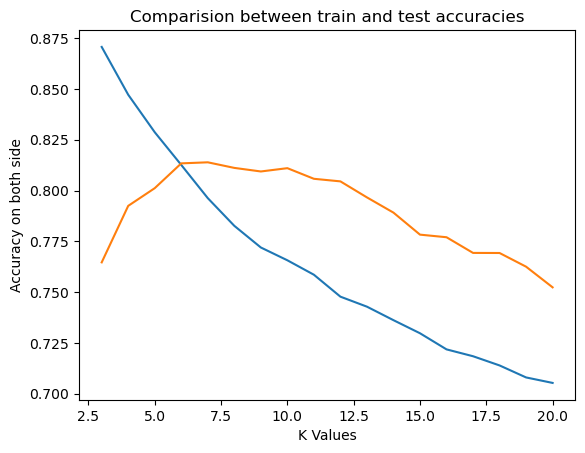

In [113]:
plt.plot(k_val,r2_score_train_list)
plt.plot(k_val,r2_score_test_list)
plt.xlabel("K Values")
plt.ylabel("Accuracy on both side")
plt.title("Comparision between train and test accuracies")

In [114]:
#will find best k val for p=2
r2_score_train_list=[]
r2_score_test_list=[]
k_val=range(3,21)
for k in k_val:
    KR=KNeighborsRegressor(n_neighbors=k,p=2)
    KR.fit(scale_df,y_train)
    r2_score_train=KR.score(scale_df,y_train)
    r2_score_train_list.append(r2_score_train)
    #testing
    r2_score_test=KR.score(scale_df_test,y_test)
    r2_score_test_list.append(r2_score_test)

Text(0.5, 1.0, 'Comparision between train and test accuracies')

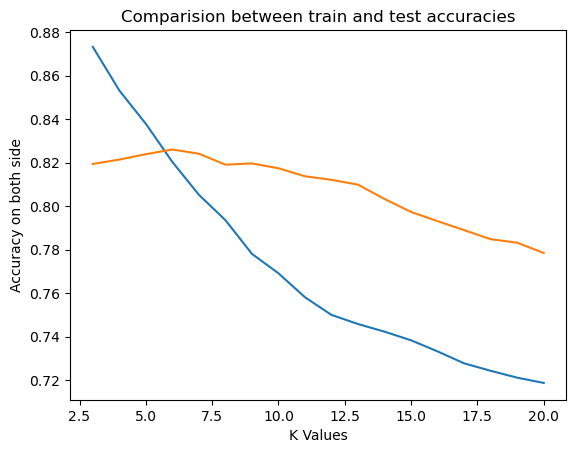

In [115]:
plt.plot(k_val,r2_score_train_list)
plt.plot(k_val,r2_score_test_list)
plt.xlabel("K Values")
plt.ylabel("Accuracy on both side")
plt.title("Comparision between train and test accuracies")

In [116]:
#evalaution with hyperparameter tuning p=1
#using scaling
KR=KNeighborsRegressor(n_neighbors=6,p=1)
KR.fit(scale_df,y_train)
#traning
y_pred=KR.predict(scale_df)
r2=r2_score(y_train,y_pred)
print('r2 score ', r2)
mse=mean_squared_error(y_train,y_pred)
print('mse ', mse)
mae=mean_absolute_error(y_train,y_pred)
print('mae ',mae)

#transforming
print()
array=scale_KR.transform(x_test)
scale_df_test=pd.DataFrame(array,columns=x_test.columns)
#TESTING
y_pred=KR.predict(scale_df_test)
r2=r2_score(y_test,y_pred)
print('r2 score ', r2)
mse=mean_squared_error(y_test,y_pred)
print('mse ', mse)
mae=mean_absolute_error(y_test,y_pred)
print('mae ',mae)

r2 score  0.8126032609514401
mse  26825018.324816175
mae  3306.659259173838

r2 score  0.8133845422088942
mse  29875924.89747344
mae  3477.2797729465174


In [117]:
#evalaution with hyperparameter tuning p=2
#using scaling
KR=KNeighborsRegressor(n_neighbors=6,p=2)
KR.fit(scale_df,y_train)
#traning
y_pred=KR.predict(scale_df)
r2=r2_score(y_train,y_pred)
print('r2 score ', r2)
mse=mean_squared_error(y_train,y_pred)
print('mse ', mse)
mae=mean_absolute_error(y_train,y_pred)
print('mae ',mae)

#transforming
print()
array=scale_KR.transform(x_test)
scale_df_test=pd.DataFrame(array,columns=x_test.columns)
#TESTING
y_pred=KR.predict(scale_df_test)
r2=r2_score(y_test,y_pred)
print('r2 score ', r2)
mse=mean_squared_error(y_test,y_pred)
print('mse ', mse)
mae=mean_absolute_error(y_test,y_pred)
print('mae ',mae)

r2 score  0.8203145842367913
mse  25721176.339686833
mae  3271.3913370487994

r2 score  0.8260546552047154
mse  27847521.951725088
mae  3488.178971584577


In [118]:
with open('KR_model.pkl','wb') as file:
    pickle.dump(KR,file)

In [119]:
with open('scale_model.pkl','wb') as file:
    pickle.dump(scale_KR,file)

In [121]:
label_encode_data = {"gender":{"female":1,"male":0},
                     "smoker":{"yes":1,"no":0},
                     "columns":list(x.columns)}
label_encode_data

{'gender': {'female': 1, 'male': 0},
 'smoker': {'yes': 1, 'no': 0},
 'columns': ['gender',
  'bmi',
  'children',
  'smoker',
  'region_northeast',
  'region_northwest',
  'region_southeast',
  'region_southwest',
  'age_buckets',
  'weight',
  'risky']}

In [122]:
with open ('project_data.json','w') as file:
    json.dump(label_encode_data,file)